In [183]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import requests
from pathlib import Path
import numpy as np
import time
import scipy.stats as st
%matplotlib inline
from scipy.stats import linregress

In [184]:
# this dataset shows net change % in median single home price 
file= Path("data/mortgage_rate_2.csv")
price_change =pd.read_csv(file)
del_price_change = price_change.drop(columns = ["Unnamed: 88", "Unnamed: 89"])
del_price_change_df = pd.DataFrame(del_price_change)
clean_price_change = del_price_change_df.drop([2,3,7])
clean_price_change

,Region,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,...,July 2022,August 2022,September 2022,October 2022,November 2022,December 2022,January 2023,February 2023,March 2023,April 2023
0,National,-0.56,5.09,3.02,2.92,3.23,-1.54,-0.34,-1.69,0.04,...,-3.23,-1.85,-0.91,-1.77,-1.20,-2.02,-0.80,0.46,3.71,2.45
1,"Austin, TX",9.77,0.59,6.79,-1.94,0.35,-1.75,2.86,-5.14,-2.49,...,1.78,-9.14,-4.07,1.51,-5.16,-3.17,0.45,-0.45,1.82,8.08
4,"Denver, CO",4.72,10.26,1.03,1.52,1.75,-1.72,-2.50,0.77,4.33,...,-4.86,-7.80,0.00,0.00,0.77,-9.16,-1.01,3.62,1.99,8.52
5,"Las Vegas, NV",2.33,-4.55,2.38,4.65,2.22,-0.76,0.77,-1.30,1.32,...,-4.14,-5.46,0.00,-1.67,-0.64,-2.83,1.70,0.00,1.19,2.35
6,"Los Angeles, CA",0.16,4.37,0.38,3.03,-0.15,0.88,1.06,-2.49,-1.11,...,-8.73,-0.43,-3.93,-3.18,5.16,-5.98,-0.28,4.76,7.05,-8.28
8,"Portland, OR",-1.69,12.32,2.42,2.18,-1.01,3.42,-3.57,-3.21,3.70,...,-1.93,-2.66,-3.18,1.41,-2.95,-4.85,-2.92,2.01,6.85,-0.92
9,"San Francisco, CA",18.74,-2.00,2.22,-1.45,-3.13,-0.95,-0.54,-5.24,13.82,...,-9.05,-3.46,0.93,-0.62,-6.83,4.93,-13.28,9.16,8.89,-4.47
10,"Seattle, WA",9.90,-0.15,-1.30,1.94,4.86,-2.17,-4.89,2.49,-4.37,...,-4.55,-6.19,-0.51,-0.51,-3.18,-2.01,-8.11,1.76,14.16,-1.27
11,Interest Rate,3.87,3.66,3.69,3.61,3.60,3.57,3.44,3.44,3.46,...,5.52,5.41,5.22,6.11,6.90,6.81,6.36,6.27,6.26,6.54


In [185]:
# Cleaning and Consolidating df to have dates before covid slicing to quarters to make data more manageable, left out region since it was giving me erors 
pre_covid = clean_price_change[['February 2016','April 2016','July 2016', 'October 2016','January 2017','April 2017','July 2017', 'October 2017','January 2018','April 2018','July 2018', 'October 2018','January 2019']]
pre_covid

,February 2016,April 2016,July 2016,October 2016,January 2017,April 2017,July 2017,October 2017,January 2018,April 2018,July 2018,October 2018,January 2019
0,-0.56,3.02,-1.54,0.04,-2.22,2.74,-1.96,-0.90,-2.81,1.68,-1.95,0.36,-1.70
1,9.77,6.79,-1.75,-2.49,-8.61,0.19,-5.23,3.13,-3.33,6.67,0.77,3.96,-7.71
4,4.72,1.03,-1.72,4.33,0.00,3.08,-0.18,6.69,3.73,7.76,-2.19,4.00,-3.44
5,2.33,2.38,-0.76,1.32,1.77,2.74,-0.97,-2.95,0.00,1.81,0.93,-3.30,7.14
6,0.16,0.38,0.88,-1.11,7.23,2.65,3.33,-0.55,-4.31,1.32,-3.43,-1.32,-1.32
8,-1.69,2.42,3.42,3.70,1.80,0.55,-0.01,0.00,3.55,2.47,-2.39,-1.71,-2.84
9,18.74,2.22,-0.95,13.82,-3.36,7.17,-4.18,16.11,-8.18,-1.61,-0.31,6.67,-10.17
10,9.90,-1.30,-2.17,-4.37,-3.85,3.86,-2.28,3.45,6.75,3.45,-0.63,-1.98,-0.98
11,3.87,3.69,3.57,3.46,4.20,4.20,3.90,3.81,3.95,4.44,4.57,4.63,4.64


In [186]:
month = pre_covid.keys()
month

Index(['February 2016', 'April 2016', 'July 2016', 'October 2016',
       'January 2017', 'April 2017', 'July 2017', 'October 2017',
       'January 2018', 'April 2018', 'July 2018', 'October 2018',
       'January 2019'],
      dtype='object')

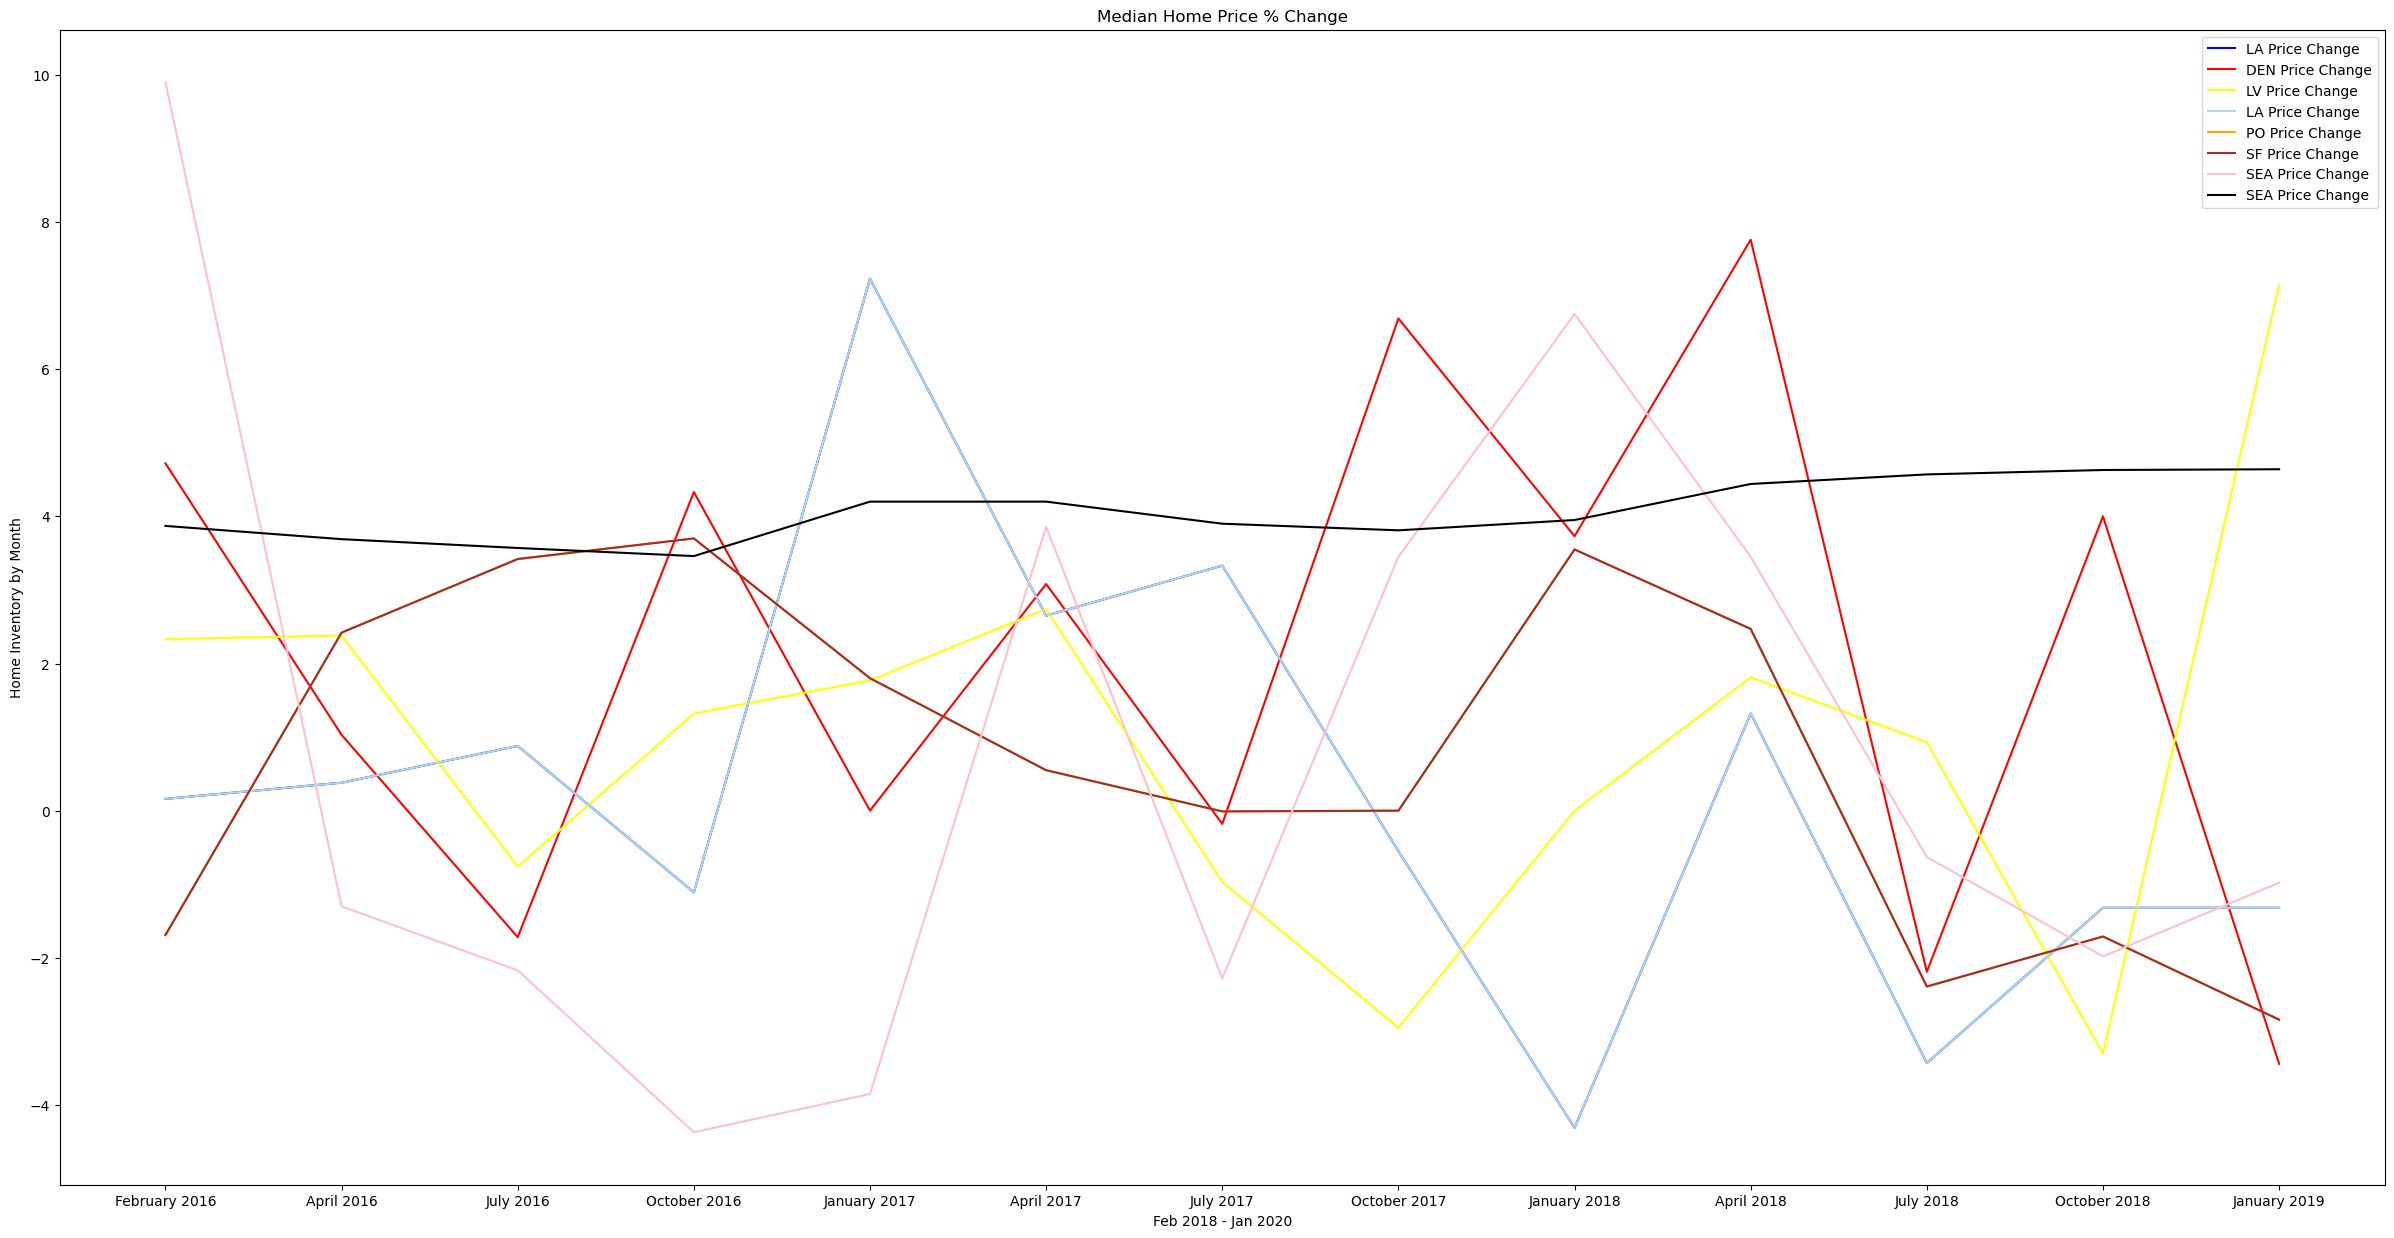

In [187]:
#setting up values to plot % change in median home price 
national = pre_covid.loc[0]
ATX = pre_covid.loc[1]
DEN = pre_covid.loc[4]
LV = pre_covid.loc[5]
LA = pre_covid.loc[6]
PO = pre_covid.loc[8]
SF = pre_covid.loc[8]
SEA = pre_covid.loc[10]
int_rate = pre_covid.loc[11]

plt.figure(figsize = (30,15))

ATX_plot = plt.plot(month, LA, color = "blue", label = "LA Price Change")
DEN_plot = plt.plot(month, DEN, color = "red", label = "DEN Price Change")
LV_plot = plt.plot(month, LV, color = "yellow", label = "LV Price Change")
LA_plot = plt.plot(month, LA, color = "lightblue", label = "LA Price Change")
PO_plot = plt.plot(month, PO, color = "orange", label = "PO Price Change")
SF_plot = plt.plot(month, SF, color = "brown", label = "SF Price Change")
SEA_plot = plt.plot(month, SEA, color = "pink", label = "SEA Price Change")
int_rate_plot = plt.plot(month, int_rate, color = "black", label = "SEA Price Change")

plt.legend()
plt.title("Median Home Price % Change")
plt.xlabel("Feb 2018 - Jan 2020")
plt.ylabel("Home Inventory by Month")
plt.show()


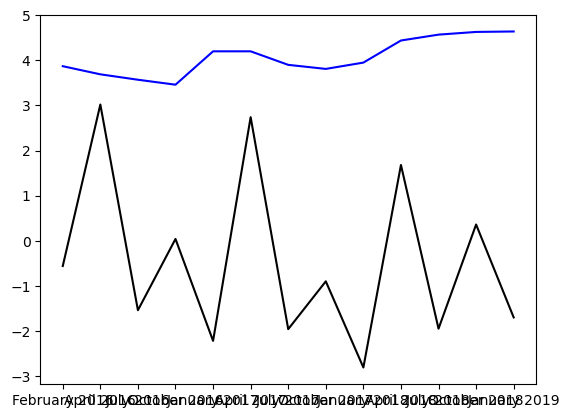

<Figure size 3000x500 with 0 Axes>

In [188]:
#Graph with interest rate vs national
national = pre_covid.loc[0]
int_rate = pre_covid.loc[11]


int_rate_plot = plt.plot(month, int_rate, color = "Blue", label = "Interest Change")
national = plt.plot(month, national, color = "black", label = "Interest Change")


plt.figure(figsize=(30,5))
plt.show()

In [199]:
# now we want to see the changes during and afte covid 
#start by selecting months
post_covid = clean_price_change[['February 2019','April 2019','July 2019', 'October 2019','January 2020','April 2020','July 2020', 'October 2020','January 2021','April 2021','July 2021', 'October 2021','January 2022']]

months_2 = post_covid.keys()
post_covid

,February 2019,April 2019,July 2019,October 2019,January 2020,April 2020,July 2020,October 2020,January 2021,April 2021,July 2021,October 2021,January 2022
0,0.75,2.31,-0.87,0.24,-2.34,0.21,4.41,0.31,-1.01,4.84,-0.47,0.45,-1.25
1,2.71,6.86,0.00,0.94,-2.28,-0.06,3.37,5.56,0.20,9.76,0.40,-3.52,2.61
4,7.43,6.37,0.00,0.21,-0.44,0.59,3.77,4.63,-5.96,3.99,-3.08,-0.83,-7.30
5,-5.00,-5.94,0.00,-2.63,-4.78,-3.23,1.59,0.61,0.30,3.57,0.77,-0.75,0.95
6,-1.27,0.25,-0.78,3.75,0.30,-7.43,13.17,-1.52,-1.45,1.20,-3.77,-0.91,-4.35
8,6.32,-3.22,-1.96,-2.65,0.09,0.53,-0.61,2.30,0.10,1.82,-2.31,1.00,0.27
9,11.32,-1.36,-8.48,7.16,2.82,2.09,-8.63,-1.52,-3.80,4.39,-3.39,2.86,-7.74
10,3.55,5.16,-3.35,1.05,6.25,-0.46,0.29,0.00,1.93,2.11,0.15,1.05,-4.81
11,4.46,4.27,3.80,3.61,3.72,3.45,3.16,2.89,2.68,3.08,2.98,2.90,3.10


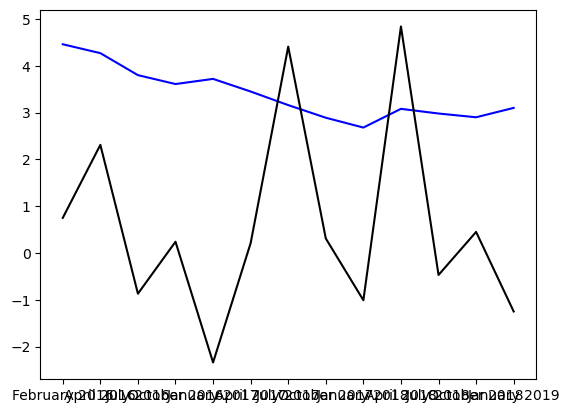

<Figure size 1000x500 with 0 Axes>

In [190]:
#Interest rates vs National % price change 

national = post_covid.loc[0]
int_rate = post_covid.loc[11]


int_rate_plot = plt.plot(month, int_rate, color = "Blue", label = "Interest Change")
national = plt.plot(month, national, color = "black", label = "Interest Change")


plt.figure(figsize=(10,5))
plt.show()

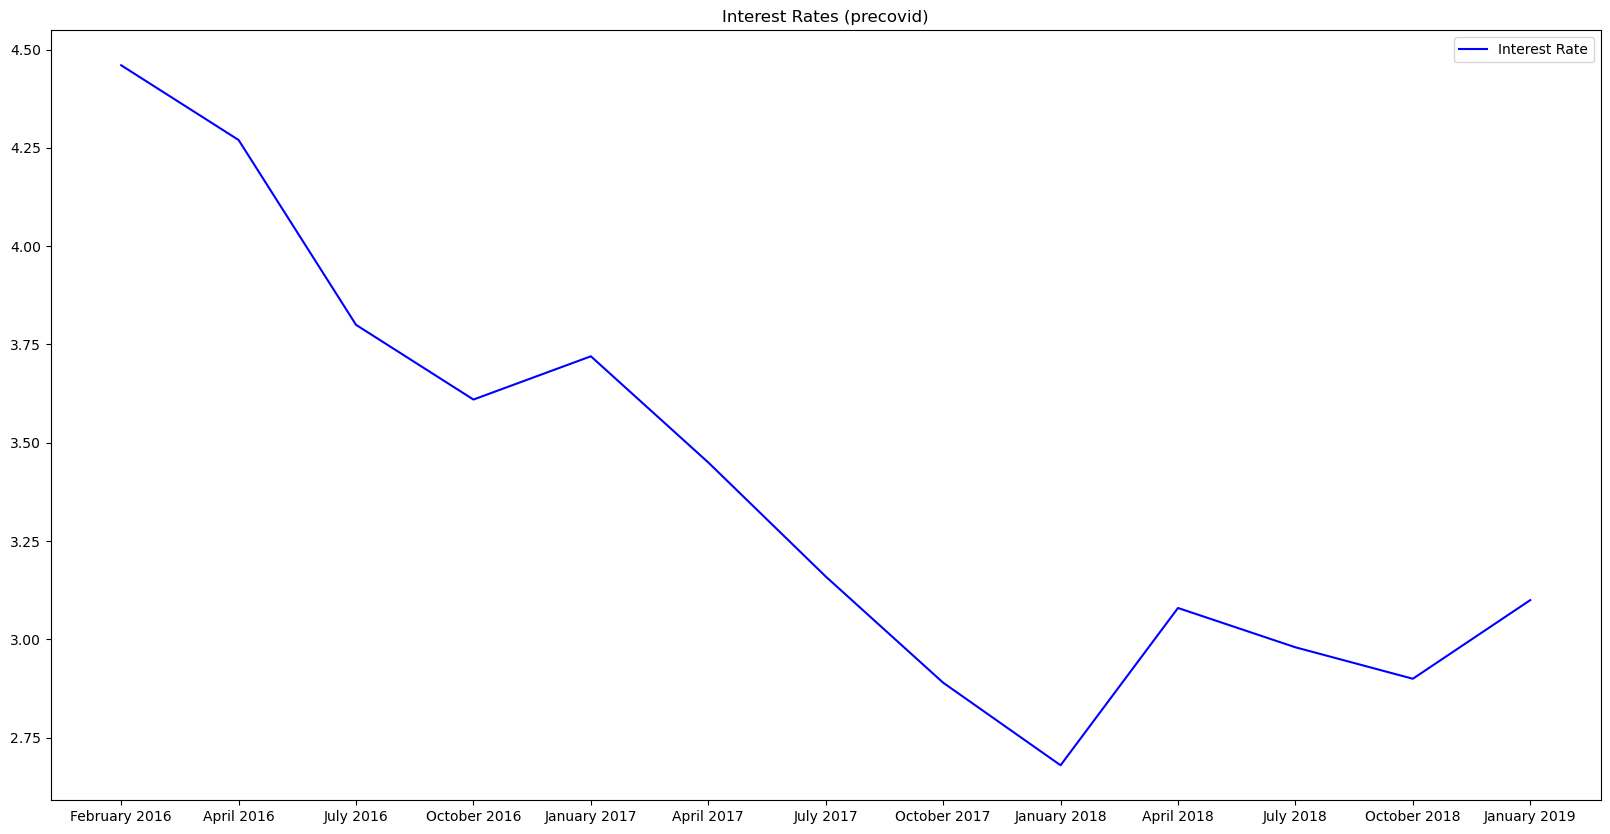

In [206]:
#scatter with only interest rate post covid  
post_covid = clean_price_change[['February 2019','April 2019','July 2019', 'October 2019','January 2020','April 2020','July 2020', 'October 2020','January 2021','April 2021','July 2021', 'October 2021','January 2022']]

plt.figure(figsize=(20,10))


plt.title("Interest Rates (precovid)")
Rate = post_covid.loc[11]
int_rate_plot = plt.plot(month, int_rate, color = "Blue", label = "Interest Rate")
plt.legend()



In [ ]:
# post covid graph 
post_covid = clean_price_change[['February 2019','April 2019','July 2019', 'October 2019','January 2020','April 2020','July 2020', 'October 2020','January 2021','April 2021','July 2021', 'October 2021','January 2022']]



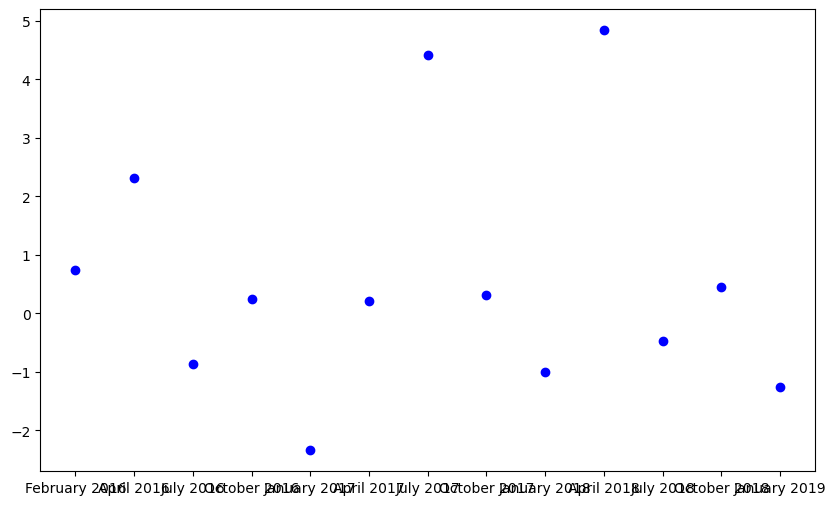

In [174]:
#scatter for national % chnage post covid 

post_covid = clean_price_change[['February 2019','April 2019','July 2019', 'October 2019','January 2020','April 2020','July 2020', 'October 2020','January 2021','April 2021','July 2021', 'October 2021','January 2022']]

national = post_covid.loc[0]

plt.figure(figsize=(10,6))

national_scatter = plt.scatter(month,national , color = "Blue", label = "Interest Change")

